This is a practice example from Andreas C.Muller and Sarah Guido's book Introduction to Machine Learning with Python.

Here, I'm practicing with Decision Trees classifier on breast cancer data.


In [ ]:
IMPLEMENTING THE CLASSIFIER

In [20]:
#Importing necesary datasets and modules

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt
import numpy as np


In [7]:
#Fitting the classifier on the cancer dataset
cancer= load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree= DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Acuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Acuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Acuracy on training set: 1.000
Acuracy on test set: 0.937


The depth of the tree was not restricted earlier, that's why the tree was able to memorize all the labels on the training data. Hence, the accuracy on the training set is 100%. 

So, let's apply pre-pruning to the tree. This will stop developing the tree before it fits perfectly on the training data. Let's set the tree depth to 4. 

In [10]:
tree= DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on the training set: {:.3f}". format(tree.score(X_train, y_train)))
print("Accuracy on the training set: {:.3f}". format(tree.score(X_test, y_test)))

Accuracy on the training set: 0.988
Accuracy on the training set: 0.951


Since, we limited the depth of the tree, training set accuracy reduced to 98% but test set accuracy has increased to 95%

ANALYZING DECISION TREES

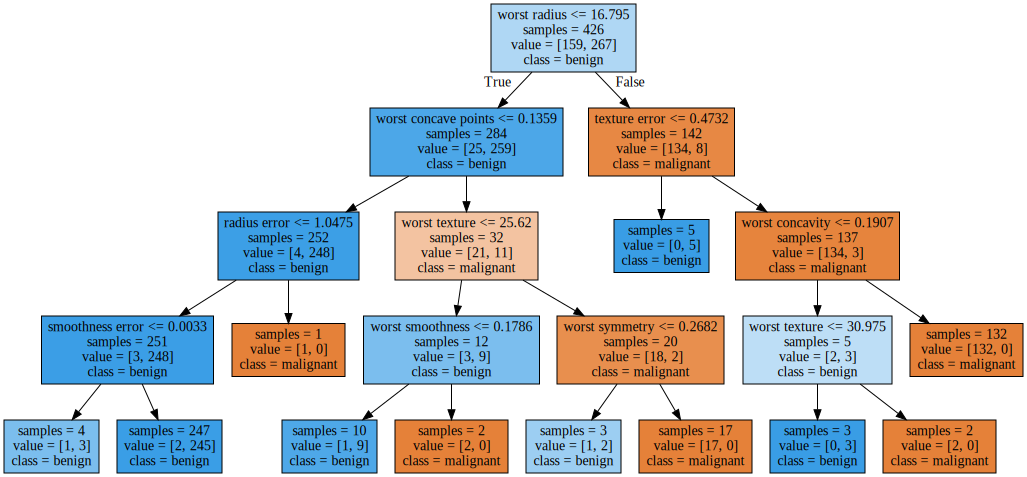

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot",class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

FEATURE IMPORTANCE ACCORDING TO DECISION TREES

In [18]:
#Calculating feature importance
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


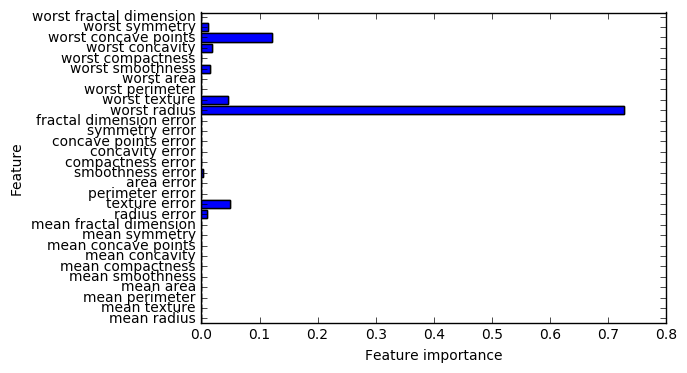

In [23]:
#Visualizing feature importance
def plot_feature_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()
plot_feature_importance(tree)